In [23]:
# Let's analyze the relationship between a DataSciencester user’s
# number of friends and the amount of time the user spends on the
# site each day (as causal relationship).

num_friends = [17, 15,  1, 13,  2,  6, 17,  4,  1,  7,  2,  1,  3,  1,  6,  1,  5, 19,  7,  2,  4,  5,  8,  2,  2, 32, 16, 10, 
               3,  4,  1,  2,  1, 10,  3, 9, 17,  2, 19,  2,  8,  2,  2,  1,  3,  1,  8, 24,  4,  6,  3,  7,  1,  6,  3,  3, 
               13, 26, 11,  2,  3, 13,  2,  1,  2, 17,  4, 16,  1, 10, 4,  2, 17,  2,  4, 10, 11,  2,  7,  9,  6,  4,  1, 19, 
               14, 40, 15,  1,  4,  2, 10,  8, 17, 32, 12, 28,  3,  2,  7, 24,  4, 22,  4,  1,  4, 4, 29, 17, 14,  4,  4,  4, 
               14, 11,  8, 10, 10, 14, 38,  9, 11,  2,  8, 13, 12,  9,  5, 11,  7,  6,  4,  8,  5,  5,  2,  3,  5,  6,  9, 21,
               1,  3,  2,  2,  3,  1, 16,  8, 14,  6,  9,  5, 14,  4,  2,  3,  1, 14,  4,  4,  4, 17,  1,  1,  4,  1,  4,  5,  
               6,  6,  2,  1, 13,  6,  2, 9,  8,  9,  4,  3,  6,  7, 21,  4,  2,  1,  3, 47,  5,  4,  8,  9, 100,  4,  6, 18,  
               4, 16,  8, 35,  3,  4,  3,  9]

daily_minutes = [18, 25, 41, 25, 15, 14, 24, 22, 35, 38,  8, 19, 40, 26, 30, 23,  6, 54, 24, 12, 16,  6, 37, 22, 40, 53, 35, 
                 46, 25, 20, 28,  4,  1, 24, 38, 43, 31, 15, 52, 31, 48, 27, 26, 28, 23, 28, 11, 45, 11, 30, 36, 21, 19, 29, 
                 13, 15, 47, 54, 41, 14, 20, 47, 29,  2, 22, 31, 34, 22, 32, 47, 30, 35, 28, 12, 10, 16, 20,  7, 42, 18, 21, 
                 12, 32, 27, 19, 42, 16, 10,  4,  5, 23, 39, 33, 39, 21, 59, 14, 41, 45, 46, 14, 44, 41,  8, 25, 10, 64, 47, 
                 36, 38, 32,  6, 35, 33, 32, 33, 13, 29, 44, 12, 43, 25, 19, 22, 48, 38, 28, 27,  7,  8, 39, 39, 28, 29,  4, 
                 25, 40, 45, 41, 59, 10,  6, 17, 41,  8, 33, 16, 26, 42, 28, 34, 40, 32, 29, 27, 39, 19, 52, 36, 19, 35, 18, 
                 27,  6, 42, 28, 14, 17, 20, 32,  5, 13, 42, 10, 23, 33, 38, 44, 21, 14, 19, 32, 48,  5, 32, 35,  2, 70, 30, 
                 42, 29, 15,  0, 41, 27, 48, 34, 31, 11, 66, 30, 24, 20, 42]


xx_data, yy_data = np.array(num_friends), np.array(daily_minutes)

In [353]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use('seaborn-whitegrid')
# sns.color_palette().as_hex()[0]

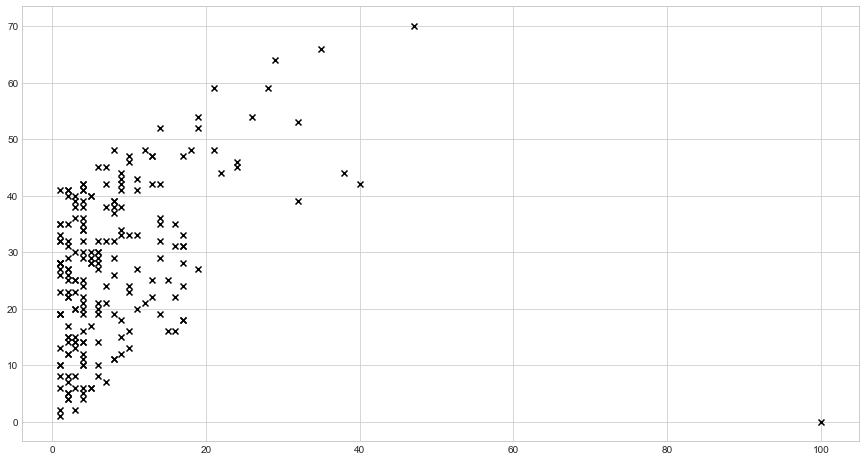

In [41]:
plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')

In [42]:
def function(x: np.ndarray, a: float, b: float) -> np.ndarray:
    return a*x + b

def error_function(y: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean((y - y_pred)**2)

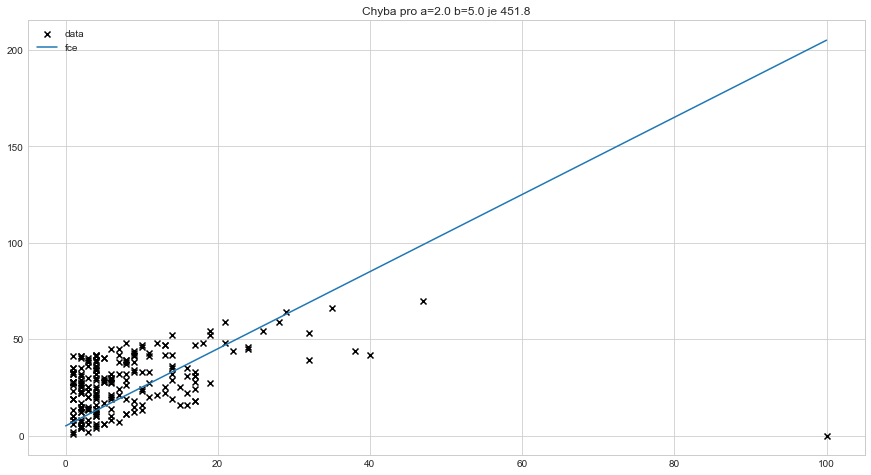

In [481]:
A, B = 2, 5

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
plt.legend();

In [483]:
def gradient_descent(dfunc, lr: float, start_point=0, max_iter=10000):
    history = []
    it = 1
    
    x_old = start_point
    x_new = None

    while (it < max_iter):

        x_new = x_old - lr * dfunc(x_old)

        (x_new, x_old) = (x_old, x_new)
        
        history.append(x_new)
        it += 1  # it = it + 1

    return x_new, history

# df = lambda x: 2*x - 1
# gradient_descent(dfunc=df, lr=0.01, start_point=0)

In [493]:
def df(w: np.ndarray) -> np.ndarray:
    a, b = w[0], w[1]
    da = 2*np.mean((a*xx_data + b - yy_data)*xx_data)
    db = 2*np.mean(a*xx_data + b - yy_data)
    return np.array([da, db])

w, hist = gradient_descent(dfunc=df, lr=0.001, max_iter=10000, start_point=np.array([1, 1]))
w

array([ 0.46471422, 23.8232968 ])

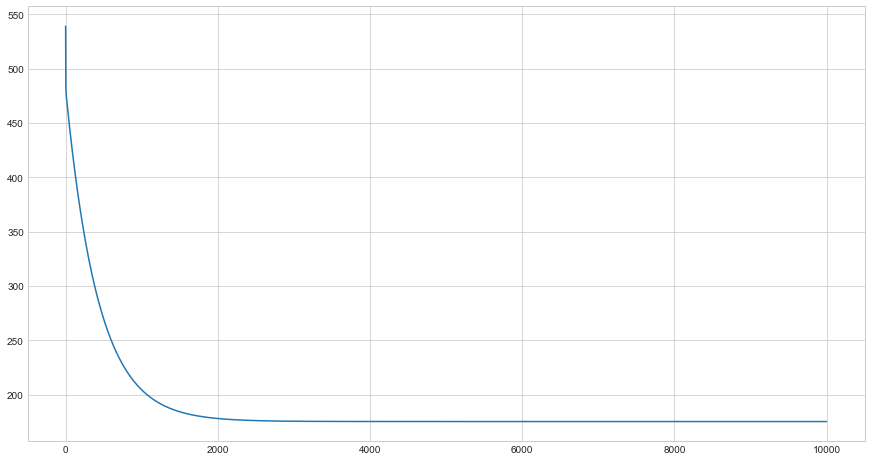

In [494]:
plt.plot([error_function(y=yy_data, y_pred=function(x=xx_data, a=w[0], b=w[1])) for w in hist])

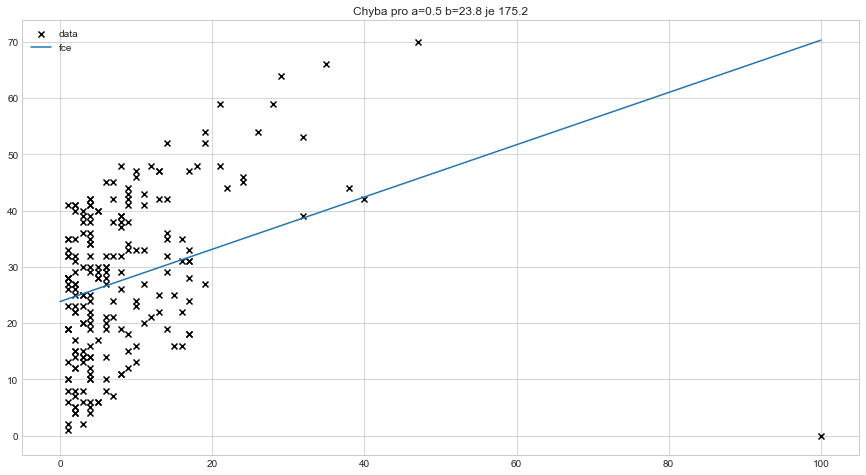

In [495]:
A, B = w[0], w[1]

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
plt.legend();

In [97]:
def df(w: np.ndarray):
    a, b = w[0], w[1]
    da = 2*np.mean((a*xx_data + b - yy_data)*xx_data) + 2*a
    db = 2*np.mean(a*xx_data + b - yy_data) + 2*b
    return np.array([da, db])

w, hist = gradient_descent(dfunc=df, lr=0.001, max_iter=10000, start_point=np.array([1, 1]))
w

array([1.18291592, 8.86990514])

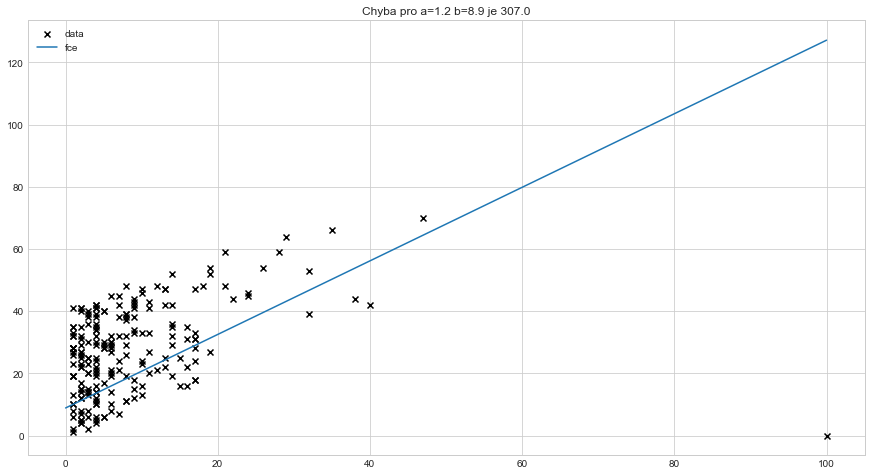

In [98]:
A, B = w[0], w[1]

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
plt.legend();

In [496]:
def log_prior(a: float, b: float) -> float:
    return -0.5*(a**2 + b**2) - 2*np.sqrt(2*np.pi)


def log_likelihood(x: np.ndarray, y: np.ndarray, a: float, b: float, s: float) -> float:
    assert len(x) == len(y)
    n = len(x)
    return -n*(s + np.sqrt(2*np.pi)) - (1/(2*(s**2)))*np.sum((y - function(x, a, b))**2)
    
def log_posterior(x: np.ndarray, y: np.ndarray, a: float, b: float, s: float) -> float:
    return log_prior(a, b) + log_likelihood(x, y, a, b, s)

In [528]:
aa = np.linspace(-1, 5, 300)
bb = np.linspace(-1, 50, 300)
s = 200

pst_ab = np.empty(shape=[len(aa), len(bb)])  # radky a, sloupce b
for i, a in enumerate(aa):
    for j, b in enumerate(bb):
        pst_ab[i, j] = log_posterior(x=xx_data, y=yy_data, a=a, b=b, s=s)

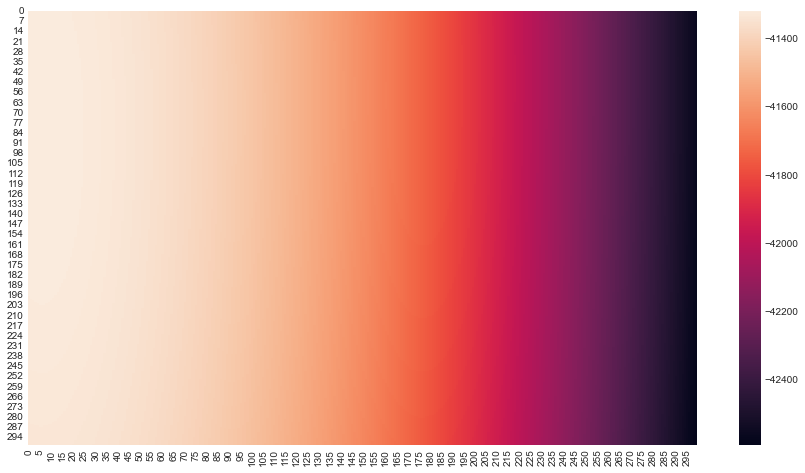

In [529]:
ax = sns.heatmap(pst_ab)

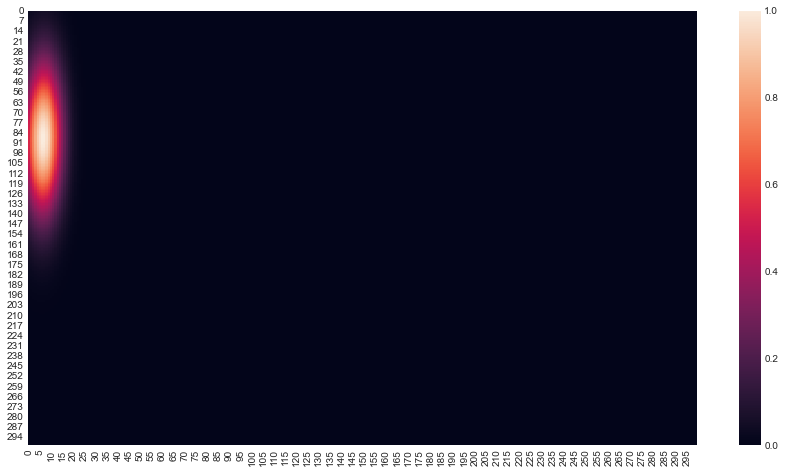

In [530]:
ax = sns.heatmap(np.exp(pst_ab - pst_ab.max()))

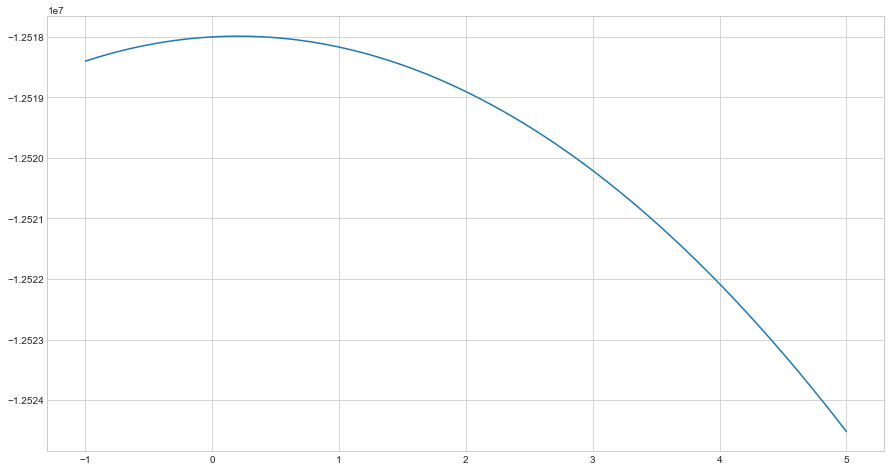

In [531]:
plt.plot(aa, pst_ab.sum(axis=1))

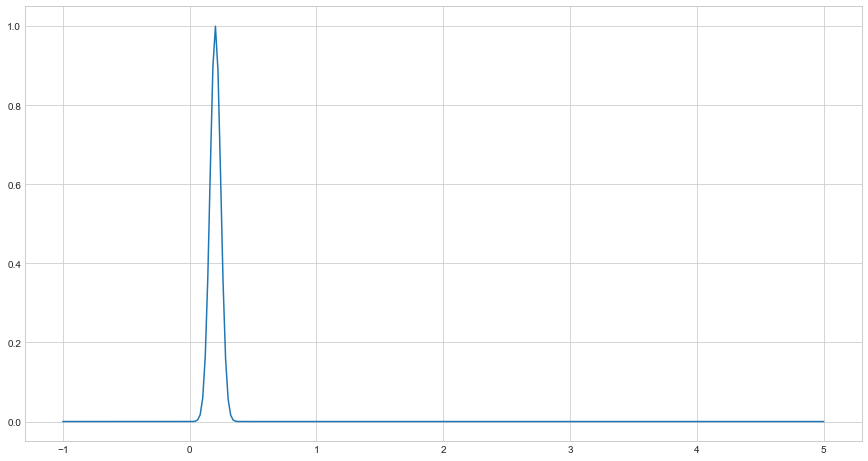

In [532]:
plt.plot(aa, np.exp(pst_ab.sum(axis=1) - pst_ab.sum(axis=1).max()))

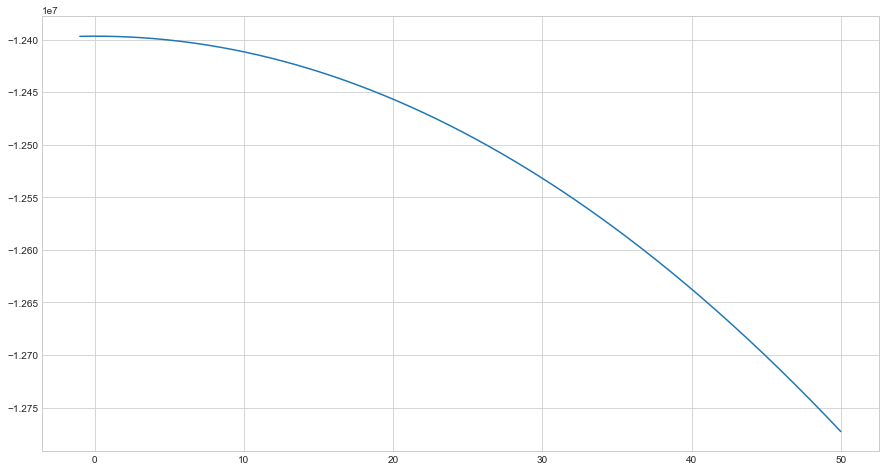

In [533]:
plt.plot(bb, pst_ab.sum(axis=0))

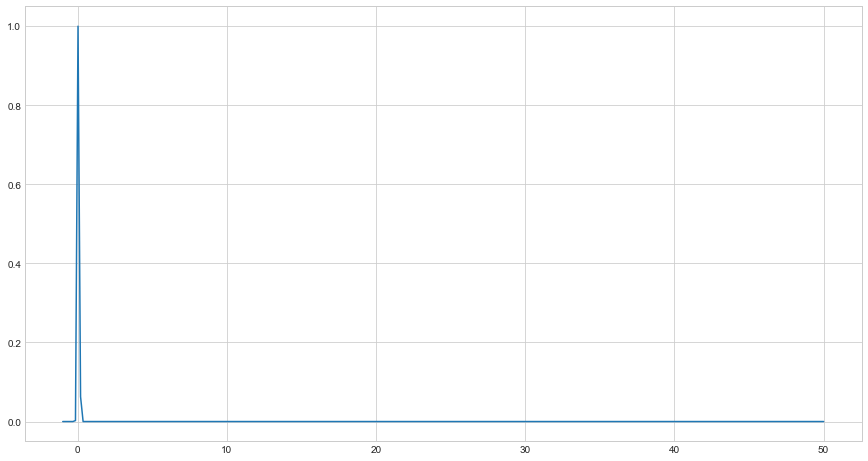

In [534]:
plt.plot(bb, np.exp(pst_ab.sum(axis=0) - pst_ab.sum(axis=0).max()))

In [535]:
a_idx, b_idx = np.unravel_index(np.argmax(pst_ab, axis=None), pst_ab.shape)
a, b = aa[a_idx], bb[b_idx]
a, b

(0.7658862876254182, 0.02341137123745818)

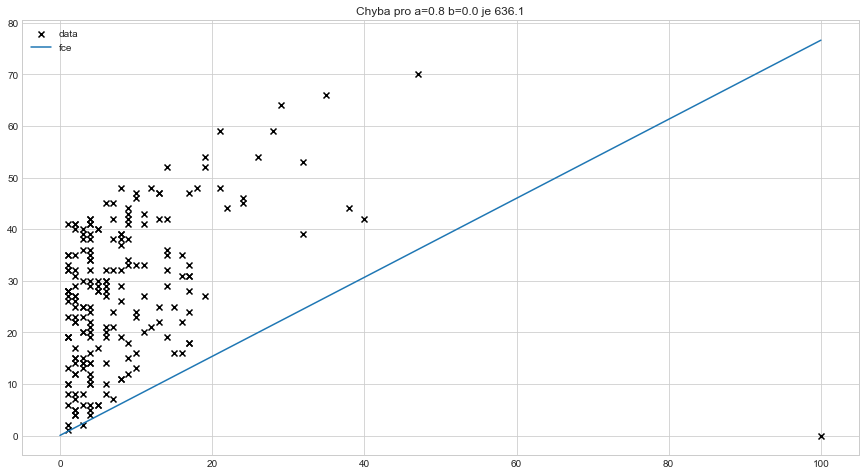

In [536]:
A, B = a, b

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
plt.legend();

In [537]:
import pymc3 as pm
import arviz as az

In [538]:
with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=1)
    b = pm.Normal('b', mu=0, sd=1)
    pred = pm.Normal('pred', mu=a*xx_data + b, sd=20, observed=yy_data)

In [539]:
with model:
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


In [540]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.337,0.118,1.128,1.559,0.002,0.002,2930.0,2810.0,1.0
b,5.566,0.915,3.859,7.243,0.018,0.013,2721.0,2521.0,1.0


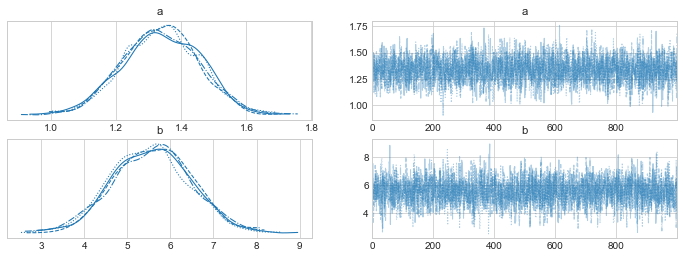

In [541]:
pm.plot_trace(trace);

In [542]:
trace.posterior['a'].shape

(4, 1000)

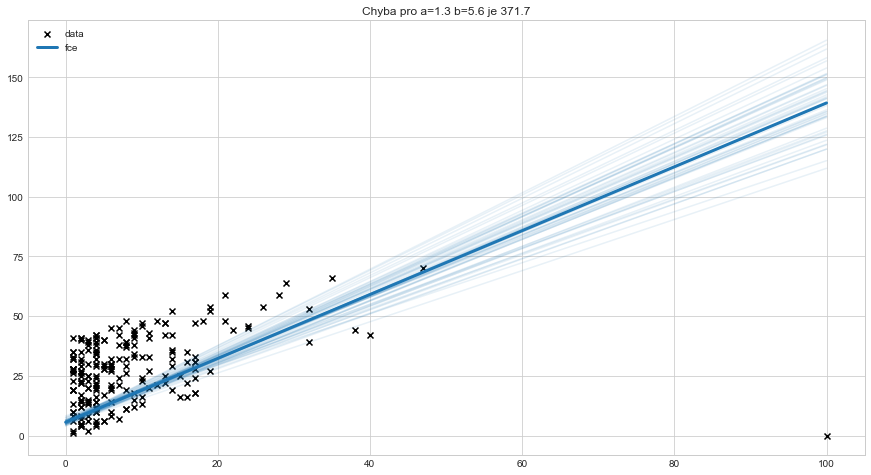

In [543]:
A, B = trace.posterior['a'].mean().values, trace.posterior['b'].mean().values

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

for k in np.random.randint(trace.posterior.dims['draw'], size=50):
    a, b = trace.posterior['a'][0, k].values, trace.posterior['b'][0, k].values
    plt.plot(xx, function(x=xx, a=a, b=b), color='#1f77b4', alpha=0.1)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, lw=3, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
plt.legend();

In [544]:
with model:
    ppc = pm.sample_posterior_predictive(trace)

In [464]:
# az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model));

/Users/jakub/opt/miniconda3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/jakub/opt/miniconda3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/jakub/opt/miniconda3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


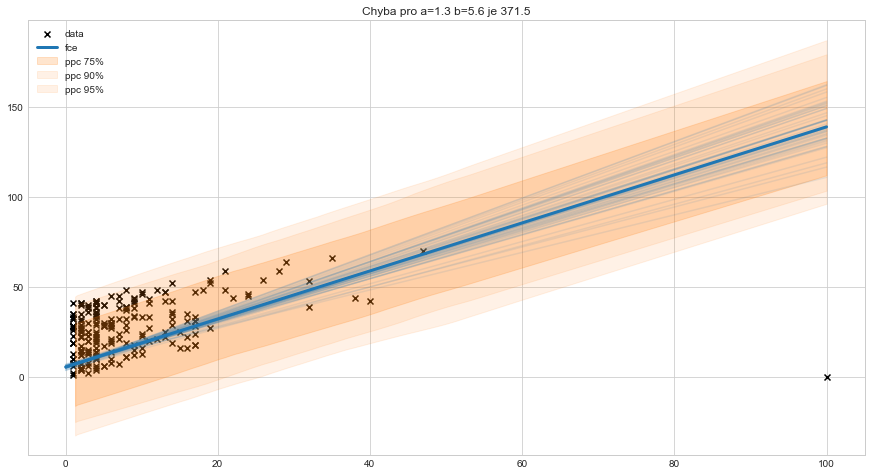

In [468]:
A, B = trace.posterior['a'].mean().values, trace.posterior['b'].mean().values

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

for k in np.random.randint(trace.posterior.dims['draw'], size=50):
    a, b = trace.posterior['a'][0, k].values, trace.posterior['b'][0, k].values
    plt.plot(xx, function(x=xx, a=a, b=b), color='#1f77b4', alpha=0.1)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, lw=3, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
pm.plot_hdi(xx_data, ppc['pred'], hdi_prob=0.75, fill_kwargs={'alpha': 0.2, 'label': 'ppc 75%'})
pm.plot_hdi(xx_data, ppc['pred'], hdi_prob=0.9, fill_kwargs={'alpha': 0.1, 'label': 'ppc 90%'})
pm.plot_hdi(xx_data, ppc['pred'], hdi_prob=0.95, fill_kwargs={'alpha': 0.1, 'label': 'ppc 95%'})
plt.legend();

In [552]:
with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=5)
    b = pm.Normal('b', mu=0, sd=5)
    
    nu = pm.Exponential('nu', 2)
    pred = pm.StudentT('pred', mu=a*xx_data + b, sd=5, nu=nu, observed=yy_data)

In [553]:
with model:
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


In [554]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.039,0.102,0.841,1.229,0.003,0.002,1728.0,1693.0,1.0
b,20.401,1.273,18.136,22.988,0.030,0.021,1847.0,1877.0,1.0
nu,1.298,0.156,1.018,1.580,0.003,0.002,2717.0,2378.0,1.0


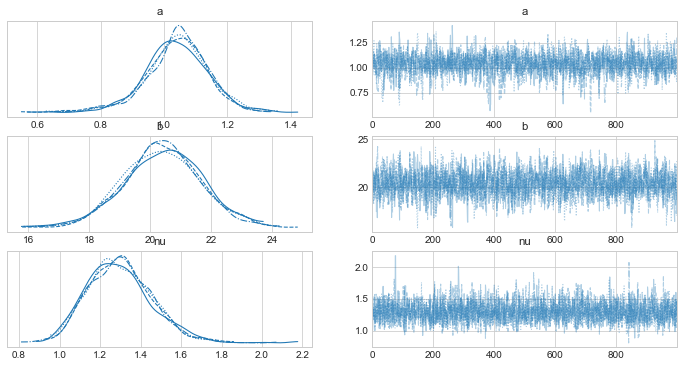

In [555]:
with model:
    pm.plot_trace(trace)

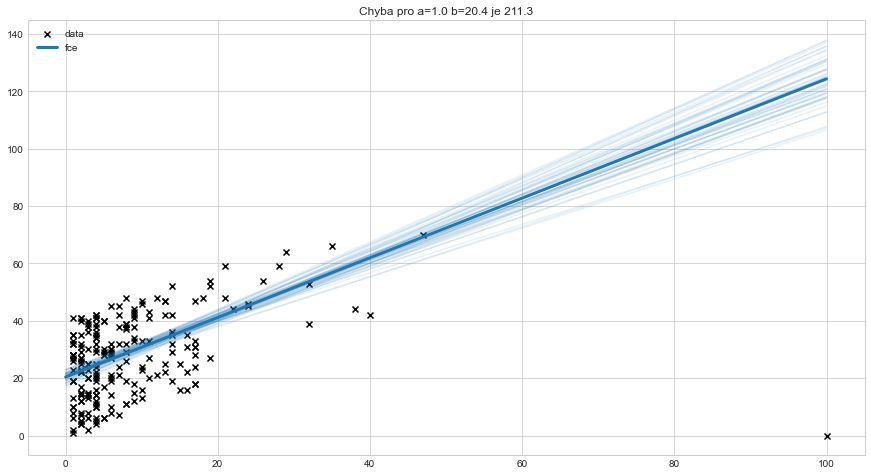

In [556]:
A, B = trace.posterior['a'].mean().values, trace.posterior['b'].mean().values

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

for k in np.random.randint(trace.posterior.dims['draw'], size=50):
    a, b = trace.posterior['a'][0, k].values, trace.posterior['b'][0, k].values
    plt.plot(xx, function(x=xx, a=a, b=b), color='#1f77b4', alpha=0.1)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, lw=3, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
plt.legend();

In [557]:
with model:
    ppc = pm.sample_posterior_predictive(trace)

/Users/jakub/opt/miniconda3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/jakub/opt/miniconda3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/jakub/opt/miniconda3/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


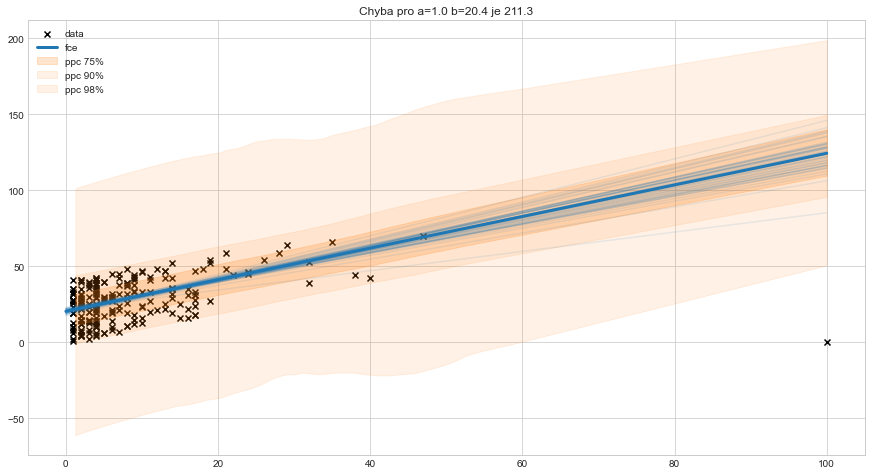

In [559]:
A, B = trace.posterior['a'].mean().values, trace.posterior['b'].mean().values

err = error_function(y=yy_data, y_pred=function(x=xx_data, a=A, b=B))

xx = np.linspace(0, 100, 200)
yy_pred = function(x=xx, a=A, b=B)

for k in np.random.randint(trace.posterior.dims['draw'], size=50):
    a, b = trace.posterior['a'][0, k].values, trace.posterior['b'][0, k].values
    plt.plot(xx, function(x=xx, a=a, b=b), color='#1f77b4', alpha=0.1)

plt.scatter(xx_data, yy_data, color='k', marker='x', label='data')
plt.plot(xx, yy_pred, lw=3, label='fce')
plt.title(f'Chyba pro a={A:.1f} b={B:.1f} je {err:,.1f}')
pm.plot_hdi(xx_data, ppc['pred'], hdi_prob=0.75, fill_kwargs={'alpha': 0.2, 'label': 'ppc 75%'})
pm.plot_hdi(xx_data, ppc['pred'], hdi_prob=0.9, fill_kwargs={'alpha': 0.1, 'label': 'ppc 90%'})
pm.plot_hdi(xx_data, ppc['pred'], hdi_prob=0.98, fill_kwargs={'alpha': 0.1, 'label': 'ppc 98%'})

plt.legend();